
## Tensorflow Basis

### _Objective_
Tensorflow 는 무엇이고 어떻게 구성되어 있는지 배워봅니다.


In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### [Optional.  Tensorflow Graph Visualization ]

---

> _Jupyter에서 Tensorflow에서 구성되는 Graph를 시각적으로 보여주기 위한 helper 메소드입니다._ <br>
> _우선 실행 시켜 주세요._<br>

In [2]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np    

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

## 문제 1. 근의 방정식 구현
* Tensorflow를 통해 아래 해를 구해주세요
$$
3x^2+4x+5 = 0
$$

#### hint, 근의 공식은 아래와 같습니다.<br>
$
x_{1}=\frac  {-b - {\sqrt  {b^{2}-ac\ }}}{a}\\
x_{2}=\frac  {-b + {\sqrt  {b^{2}-ac\ }}}{a}
$<br>

In [3]:
# 우선 실행해 주세요
tf.reset_default_graph()
a = tf.constant(3.)
b = tf.constant(4.)
c = tf.constant(5.)

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과는 두 해 중 작은 값은 `answer1_1`에 담고, 큰 값은 `answer1_2`에 담아주세요

In [11]:
sess = tf.Session()

x1 = (-b-tf.sqrt(b**2-a*c))/a
x2 = (-b+tf.sqrt(b**2-a*c))/a

answer_1 = sess.run(x1)
answer_2 = sess.run(x2)

if answer_1 < answer_2:
    answer1_1 = answer_1
    answer1_2 = answer_2
else:
    answer1_1 = answer_2
    answer1_2 = answer_1

print(answer1_1, answer1_2)

-1.6666666 -1.0


#### 정답 확인
* 정답을 입력한 후, 아래를 실행시키면 정답인지 확인합니다.

In [13]:
from numpy.testing import assert_almost_equal

assert 'answer1_1' in globals(), "결과를 answer1_1 변수에 담아주세요!"
assert 'answer1_2' in globals(), "결과를 answer1_2 변수에 담아주세요!"

A1_1 = -1.6666666
A1_2 = -1.0

assert_almost_equal(A1_1, answer1_1,
               err_msg="\nanswer1_1 정답은 \n{}\n입니다. 다시 확인해 주세요\n".format(A1_1))
assert_almost_equal(A1_2, answer1_2,
               err_msg="\nanswer1_2 정답은 \n{}\n입니다. 다시 확인해 주세요\n".format(A1_2))

## 문제 2. sin 함수 
* 아래 수식을 구현하고 시각화해 주세요

$$y(x) = \frac{sin(\pi x )}{\pi}$$

* x = 0.0~ 10.0 까지 0.01 단위로 생성합니다.

In [14]:
# 우선 실행해 주세요
tf.reset_default_graph()
pi = tf.constant(3.14,dtype=tf.float32)
xs_values = np.arange(0,10,0.01)
xs = tf.constant(xs_values, dtype=tf.float32)

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과는 `answer2`에 담아주세요

In [19]:
sess = tf.Session()
y = tf.sin(pi*xs)/pi
answer2= sess.run(y)

#### 정답 확인
* 아래와 동일하게 나오는지 확인해 주세요

![Imgur](https://i.imgur.com/sL24UV5.png)

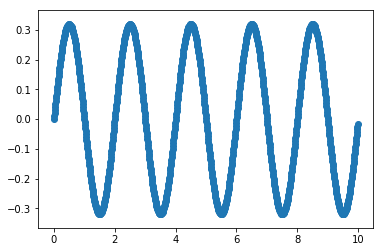

In [20]:
import matplotlib.pyplot as plt 
plt.scatter(xs_values, answer2)
plt.show()